# House Price

## Informacin de la base de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("DATA/housing.csv")
data.head(5)

In [ ]:
### Informacion en General
data.info()

In [ ]:
### Datos Importantes 
"""Se sabe que cuando mas cerca del oceano es mas caro"""
data["ocean_proximity"].value_counts()

### Visualizacion de Datos

In [ ]:
data.hist(bins=50, figsize= (20, 15)) # bins es para la cantidad de barras que se quieren en el histograma y figsize es para el tamaño de la imagen  (ancho, alto) en pulgadas


In [ ]:
data.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4, s=data["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # alpha es para la transparencia, s es para el tamaño de los puntos, c es para el color de los puntos, cmap es para el color del mapa de calor figsize es para el tamaño de la imagen  (ancho, alto) en pulgadas
plt.legend()
plt.show()

### Correlacion

In [ ]:

"""Sirve para saber que variables son las que tienen mayor correlacion con la variable que se quiere predecir, es decir la variable que mas peso tiene en la prediccion"""
plt.figure(figsize=(10,5))
sns.heatmap(data.drop('ocean_proximity', axis=1).corr(), annot=True) # annot es para mostrar los valores en la matriz de correlacion


In [ ]:
### Matriz de Correlacion
"""Nos muestra la correlacion de cada variable con la variable que queremos predecir, cuando mas cerca de 1 es mas correlacionada y cuando mas cerca de -1 es menos correlacionada"""#
corr_matrix = data.drop('ocean_proximity', axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

### Combinacion de Atributos
- `rooms_per_household` : Representa el numero medio de habitaciones por hogar en una cierta area. Proporciona una medida de la densidad de habitaciones en una vivienda promedio de esa area
- `bedrooms_per_room`  : Indica la proporcion de dormitorios con respecto al numero total de habitaciones en una cierta area
- `population_per_household` : Representa la densidad de poblacion promedio por hogar en cierta area

In [ ]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]
data

In [ ]:
corr_matrix = data.drop('ocean_proximity', axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

### Limpieza de Datos


#### Total Bedrooms
Rellenar con algo por que esta incompleto
- No se recomienda usar 0s por que puede modificar el resultado final


In [ ]:
#### Ejemplo:
x = [1,2,3,np.nan]
x1 = pd.Series(x)
print(x1.mean())


x = [1,2,3,0]
x2 = pd.Series(x)
print(x2.mean()) # Se puede que la media cambie mucho si se rellena con 0

In [ ]:
### Rellenar total bedrooms
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True) # Rellenar con la mediana y le damos el permiso de sobreescribir los datos con inplace=True
data.info()

#### ocean_proximity
Aqui lo que haremos es transformar los valores a valores numericos

In [ ]:
# Manipulacion de Dato Categorico
#* Metodo Uno
#! El problema es que puede afecta el rendimiento en un algoritmo de clasificacion
from sklearn.preprocessing import OrdinalEncoder # Nos permite codificar los numeros

data_ocen = data[['ocean_proximity']] # Seleccionamos la columna que queremos codificar,en este caso ocean_proximity 

ordinal_encoder = OrdinalEncoder() # Creamos el objeto ordinal_encoder 
data_ocen_encoded = ordinal_encoder.fit_transform(data_ocen)


In [ ]:
#
#* Metodo 2
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder() # Nos permite codificar los datos categoricos en un array de 0 y 1 
data_car_1hot = cat_encoder.fit_transform(data_ocen) # Se puede ver que el resultado es un array de 0 y 1 
print(data_car_1hot) # 0 significa que no es y 1 significa que si es, es decir si es una categoria o no


In [ ]:
#
#* Transformarmos a data frame para poder utiizar el resultad

encoded_df = pd.DataFrame(data_car_1hot.toarray(), columns=cat_encoder.get_feature_names_out()) # Transformamos el array a un data frame, es decir a una tabla con columnas y filas, y nos muestra el nombre de las columnas  con get_feature_names_out(). Cada columan significa una categoria de la variable ocean_proximity
encoded_df

# Arbol de Decision
Es un algoritmo en donde se divide en varias secciones en donde estaran los datos
Estas secciones representan ciertas caracteristicas


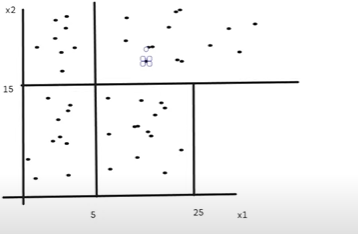


Se le pone varias condiciones y se va extendiendo como un arbol

Al final cada seccion(division de datos) retornara el promedio 


### Samos la informacion y los Datos

In [ ]:
# Variable Dependiente e Independientes

y = data["median_house_value"].values.reshape(-1,1)
X =data[[
  'median_income',
  'rooms_per_household',
  'total_rooms',
  'housing_median_age',
  'households',
]]

In [ ]:
#Agregar las variables categoricas
data_1 = pd.concat([X, encoded_df], axis=1) # Concatenamos las variables independientes con las variables categoricas, axis significa que se concatenara en las columnas 

X = data_1.values # nos quedamos con los valores de las variables independientes


In [ ]:
### Regresion Lineal (Para comparar)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento y Prediccion

li_model = LinearRegression()
li_model.fit(X_train, y_train)
y_pred = li_model.predict(X_test)

### Metricas

print(f"El r2 es: {r2_score(y_test, y_pred)}")




### 

#### Escalar Variable

In [ ]:
### 
from sklearn.preprocessing import StandardScaler # Nos permite escalar las variables, escalar significa que todas las variables tengan la misma escala, es decir que tengan el mismo rango de valores 
sc_x = StandardScaler() # Creamos el objeto sc_x 
X = sc_x.fit_transform(X) # Escalamos las variables independientes, es decir las variables que se usaran para predecir la variable dependiente

#### Probamos de Nuevo la regresion Lineal

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento y Prediccion

li_model = LinearRegression()
li_model.fit(X_train, y_train)
y_pred = li_model.predict(X_test)

### Metricas

print(f"El r2 es: {r2_score(y_test, y_pred)} (no mejoro nada)")

In [ ]:
columns = [
  # Le agregamos las variables latitude y longitude para ver su comportamiento
  'median_income',
  'rooms_per_household',
  'total_rooms',
  'housing_median_age',
  'households',
  'latitude',
  'longitude',
]
y = data["median_house_value"].values.reshape(-1,1) # Variable Dependiente


col_modelo = []
for col in columns:
  col_modelo.append(col)
  data_1 = data[col_modelo]
  data_1 = pd.concat([data_1, encoded_df], axis=1) # Explicacion: Seleccionamos las columnas que queremos, luego concatenamos las variables independientes con las variables categoricas, axis significa que se concatenara en las columnas 
  X = data_1.values # nos quedamos con los valores de las variables independientes
  
  #* De nuevo regresion Lineal
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  li_model = LinearRegression()
  li_model.fit(X_train, y_train)
  y_pred = li_model.predict(X_test)
  
  r2 = r2_score(y_test, y_pred)
  print(f"Columns: {col_modelo} , Calificacion: {r2}")  

## Arbol De Decision Code


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
columns = [
  # Le agregamos las variables latitude y longitude para ver su comportamiento
  'median_income',
  'rooms_per_household',
  'total_rooms',
  'housing_median_age',
  'households',
  'latitude',
  'longitude',
]
y = data["median_house_value"].values.reshape(-1,1) # Variable Dependiente


col_modelo = []
for col in columns:
  col_modelo.append(col)
  data_1 = data[col_modelo]
  data_1 = pd.concat([data_1, encoded_df], axis=1) # Explicacion: Seleccionamos las columnas que queremos, luego concatenamos las variables independientes con las variables categoricas, axis significa que se concatenara en las columnas 
  X = data_1.values # nos quedamos con los valores de las variables independientes
  
  #* De nuevo regresion Lineal
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  tree_model = DecisionTreeRegressor()
  tree_model.fit(X_train, y_train)
  y_pred = tree_model.predict(X_test)
  
  r2 = r2_score(y_test, y_pred)
  print(f"Columns: {col_modelo} , Calificacion: {r2}")  

# Bosque de Decision

Hay mas arboles cual cada uno retorna un valor


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
columns = [
  # Le agregamos las variables latitude y longitude para ver su comportamiento
  'median_income',
  'rooms_per_household',
  'total_rooms',
  'housing_median_age',
  'households',
  'latitude',
  'longitude',
]
y = data["median_house_value"].values # Variable Dependiente


col_modelo = []
for col in columns:
  col_modelo.append(col)
  data_1 = data[col_modelo]
  data_1 = pd.concat([data_1, encoded_df], axis=1) # Explicacion: Seleccionamos las columnas que queremos, luego concatenamos las variables independientes con las variables categoricas, axis significa que se concatenara en las columnas 
  X = data_1.values # nos quedamos con los valores de las variables independientes
  
  
  #* De nuevo regresion Lineal
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  forest_model = RandomForestRegressor()
  forest_model.fit(X_train, y_train)
  y_pred = forest_model.predict(X_test)
  
  r2 = r2_score(y_test, y_pred)
  print(f"Columns: {col_modelo} , Calificacion: {r2}")  